In [1]:
import os
import numpy as np
import ot
from src.morse import Morse
import datetime

def calc_sinkhorn_dist(a,b,n):

    # Compute the cost matrix between each pair of points in the two meshes
    C = np.sum((a[:, None, :] - b[None, :, :]) ** 2, axis=-1)

    # Compute the Sinkhorn distance
    reg = 1e-3
    G0 = ot.emd(np.ones(n) / n, np.ones(n) / n, C, reg)
    sinkhorn_dist = np.sum(G0 * C)
    return sinkhorn_dist

def nearest_neighbour (mesh,centroids):

    dist, index = mesh.kdtree.query(centroids)

    # Return the nearest neighbor vertex and its distance from the query point
    centroids_nearest_neighbor = mesh.vertices[index]

    return centroids_nearest_neighbor    

# calculate the sinkhorn distance
def calc_normal_weak_sinkhorn2(x,y):

    # define the regularization parameter
    epsilon = 0.001

    # define two point clouds
    X = np.array(x)
    Y = np.array(y)

    # compute the distance matrix between X and Y
    C = ot.dist(X, Y)

    # normalize the distance matrix
    C = C / np.max(C)

    # compute the Sinkhorn distance matrix
    # unit 

    # softmax(np.ones(Y.shape[0])) == np.ones(X.shape[0])/X.shape[0]
    sinkhorn2 = ot.sinkhorn2(np.ones(X.shape[0])/X.shape[0], np.ones(Y.shape[0])/Y.shape[0], C, epsilon,numItermax = 10000)

    # compute the Weak Sinkhorn distance
    weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()

    # print the Weak Sinkhorn distance
    # print('Sinkhorn distance:', sinkhorn2)    

    # print the Weak Sinkhorn distance
    # print('Weak Sinkhorn distance:', weak_sinkhorn)

    return sinkhorn2, weak_sinkhorn

def command_line_GigaMesh(path,name, method, parameters = ' '):
    giga_path = "~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/"

    print("{0}{1}{2}{3}{4}{5}{6}".format(str(giga_path),str(method),' ', str(parameters), ' ' , str(name) ,'.ply'))

    os.chdir(path)
    
    os.system("{0}{1}{2}{3}{4}{5}{6}".format(str(giga_path),str(method),' ', str(parameters), ' ' , str(name) ,'.ply'))

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
path = '/home/linsel/Documents/PhD/Data/NeanderthalMuseum/3D_Data/temp/'
exp_path = 'exp_path/'
path_exp = path + exp_path

os.chdir(path)

from SinkhornDistance.SinkhornVoronoi import sinkhornVoronoi,calc_sinkhorn_dist

In [3]:
from Orientation.ArtefactOrientation import artefactOrientation
import trimesh

stopping_point = False

for n,art in enumerate(os.listdir(path)):
    print(art)
    if art[:-4] == 'K030':
        stopping_point = True
        continue    
    
    if art.endswith(".ply") and stopping_point == True and not art.endswith('_GMCF_r1.00_n4_v256.volume.ply') and not art.endswith('_GMCF.ply'): 

        art = art [:-4]
        # 1. Cleaning and filling 
        method = "./gigamesh-clean"
        
        command_line_GigaMesh(path,art,method)

        append = '_GMCF' 
        art_1 = art + append

        # 2. Calculate integral invariants and max curvature        

        method = "./gigamesh-featurevectors"

        command_line_GigaMesh(path, art_1, method, '-r 1')

        append = '_r1.00_n4_v256.volume' 
        art_1_2 = art_1 + append


        # 3. Orienatate the artifact
        append = '_O' 

        AO_1 = artefactOrientation()
        AO_1.load_ply(path, art_1_2, exp_path)
        AO_1.get_or_calc_curvature()
        AO_1.initial_orientation()

        del AO_1


G083.ply
G004.ply
Bla-028.ply
Bla014.ply
Fla013_GMCF_r1.00_n4_v256.normal.mat
Bla006_GMCF_r1.00_n4_v256.volume.ply
Bla-020.ply
Bla-016_GMCF.ply
Oss050_GMCF_r1.00_n4_v256.info.txt
N-D050_GMCF.mesh_polish.json
K109_GMCF_r1.00_n4_v256.surface.mat
SP008.ply
BP010.ply
Bla003_GMCF.mesh_polish.json
K016_GMCF.ply
Bi051.ply
P012_GMCF.mesh_polish.txt
P080.ply
Oss050.ply
Fla005_GMCF.ply
P103_GMCF_r1.00_n4_v256.volume.mat
R008.ply
G012_GMCF_r1.00_n4_v256.info.txt
K109.ply
P008_GMCF.mesh_polish.ttl
K086.ply
Bla-050_GMCF.mesh_polish.ttl
Bla-034.ply
Bi073.ply
Bi078.ply
Bla016.ply
Misc003.ply
Bla030.ply
Bi066_GMCF.mesh_polish.json
Bla-028_GMCF.ply
Bi051_GMCF_r1.00_n4_v256.volume.ply
Bla-028_GMCF_r1.00_n4_v256.volume.ply
Tech034_GMCF_r1.00_n4_v256.info.txt
Bla-008_GMCF_r1.00_n4_v256.volume.mat
P024.ply
Tech034.ply
N-D053.ply
Bla031.ply
N-D045.ply
Bu053.ply
K105.ply
K016_GMCF.mesh_polish.ttl
G012.ply
Bla-059.ply
Bu002.ply
P106_GMCF.mesh_polish.json
Fla007.ply
Bu078_GMCF.mesh_polish.xml
G014.ply
Tech027_

[GigaMesh] File '"G007_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"G007_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: G007_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


27.656607389450073
Tech079_GMCF.mesh_polish.ttl
Fla042.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Fla042.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Fla042.ply...
[GigaMesh] Processed files: 1
~

[GigaMesh] File '"Fla042_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Fla042_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Fla042_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


7.020512342453003
Oss043.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Oss043.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Oss043.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desk

[GigaMesh] File '"Oss043_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Oss043_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Oss043_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


1.1565783023834229
R040.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   R040.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file R040.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Q

[GigaMesh] File '"R040_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"R040_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: R040_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


8.242493391036987
R046.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   R046.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file R046.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Qt

[GigaMesh] File '"R046_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"R046_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: R046_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


9.820518732070923
P077.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P077.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P077.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Qt

[GigaMesh] File '"P077_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P077_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P077_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


9.725056409835815
Bu020.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu020.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bu020.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop

[GigaMesh] File '"Bu020_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu020_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu020_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


4.373281478881836
Bla006_GMCF_r1.00_n4_v256.normal.mat
Bi081_GMCF_r1.00_n4_v256.info.txt
K105_GMCF_r1.00_n4_v256.normal.mat
Bla-017_GMCF_r1.00_n4_v256.volume.mat
P097.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P097.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ---------------------------------------------

[GigaMesh] File '"P097_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P097_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P097_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


7.043830394744873
P011.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P011.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P011.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Qt

[GigaMesh] File '"P011_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P011_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P011_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


10.362954139709473
Misc005_GMCF_r1.00_n4_v256.volume.mat
G004_GMCF.ply
Fla042_GMCF_r1.00_n4_v256.volume.ply
R043_GMCF.mesh_polish.json
Bu012.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu012.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------

[GigaMesh] File '"Bu012_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu012_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu012_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


2.8895978927612305
Bu058.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu058.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bu058.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Deskto

[GigaMesh] File '"Bu058_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu058_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu058_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


13.083534955978394
R079.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   R079.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file R079.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Q

[GigaMesh] File '"R079_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"R079_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: R079_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


6.367002964019775
Bu078.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu078.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bu078.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop

[GigaMesh] File '"Bu078_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu078_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu078_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


9.06882381439209
P080_GMCF.mesh_polish.ttl
Fla013.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Fla013.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Fla013.ply...
[GigaMesh] Processed files: 1
~/Down

[GigaMesh] File '"Fla013_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Fla013_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Fla013_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


7.7432050704956055
Bla-016_GMCF_r1.00_n4_v256.volume.ply
Oss075_GMCF.mesh_polish.ttl
Bla-034_GMCF.mesh_polish.ttl
Bu036.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu036.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMes

[GigaMesh] File '"Bu036_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu036_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu036_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


11.9593665599823
K027_GMCF.mesh_polish.txt
Bu089.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bu089.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bu089.ply...
[GigaMesh] Processed files: 1
~/Downloa

[GigaMesh] File '"Bu089_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bu089_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bu089_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


2.987976551055908
Bla067.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bla067.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bla067.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desk

[GigaMesh] File '"Bla067_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bla067_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bla067_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


3.6517715454101562
Bla-026.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bla-026.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bla-026.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-

[GigaMesh] File '"Bla-026_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bla-026_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bla-026_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


1.3147008419036865
G008.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   G008.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file G008.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Q

[GigaMesh] File '"G008_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"G008_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: G008_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


7.411312103271484
BP004_GMCF_r1.00_n4_v256.info.txt
P106.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P106.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P106.ply...
[GigaMesh] Processed files: 1
~/D

[GigaMesh] File '"P106_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P106_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P106_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


3.990328311920166
Bi029_GMCF_r1.00_n4_v256.normal.mat
K016.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   K016.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file K016.ply...
[GigaMesh] Processed files: 1
~

[GigaMesh] File '"K016_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"K016_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: K016_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


12.032313823699951
P029.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P029.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P029.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Q

[GigaMesh] File '"P029_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P029_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P029_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


5.536420106887817
K020_GMCF_r1.00_n4_v256.surface.mat
Oss045.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Oss045.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Oss045.ply...
[GigaMesh] Processed file

[GigaMesh] File '"Oss045_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Oss045_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Oss045_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


10.300612449645996
P008_GMCF.ply
Bu053_GMCF_r1.00_n4_v256.surface.mat
Bu078_GMCF_r1.00_n4_v256.surface.mat
Bla-016.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bla-016.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] 

[GigaMesh] File '"Bla-016_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bla-016_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bla-016_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


1.8168761730194092
P049.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P049.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P049.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop_Q

[GigaMesh] File '"P049_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P049_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P049_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


1.7088360786437988
N-D023.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   N-D023.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file N-D023.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Des

[GigaMesh] File '"N-D023_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"N-D023_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: N-D023_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


3.7421164512634277
Bla-020_GMCF.mesh_polish.json
Bla-050.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bla-050.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bla-050.ply...
[GigaMesh] Processed files:

[GigaMesh] File '"Bla-050_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bla-050_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bla-050_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


3.5776236057281494
Bla-008_GMCF.mesh_polish.json
K003.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   K003.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file K003.ply...
[GigaMesh] Processed files: 1
~/Down

[GigaMesh] File '"K003_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"K003_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: K003_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


37.05222272872925
K105_GMCF_r1.00_n4_v256.surface.mat
P004.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P004.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file P004.ply...
[GigaMesh] Processed files: 1
~

[GigaMesh] File '"P004_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P004_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P004_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


6.972856283187866
Bu053_GMCF_r1.00_n4_v256.info.txt
N-D004.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   N-D004.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file N-D004.ply...
[GigaMesh] Processed files:

[GigaMesh] File '"N-D004_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"N-D004_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: N-D004_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


3.9998269081115723
Bi066.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bi066.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bi066.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Deskto

[GigaMesh] File '"Bi066_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bi066_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bi066_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


2.4321770668029785
K108_GMCF.mesh_polish.xml
P004_GMCF_r1.00_n4_v256.surface.mat
N-D010_GMCF.mesh_polish.txt
Misc005.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Misc005.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh

[GigaMesh] File '"Misc005_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Misc005_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Misc005_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


11.524230718612671
K020_GMCF_r1.00_n4_v256.volume.ply
Bla062.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bla062.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bla062.ply...
[GigaMesh] Processed file

[GigaMesh] File '"Bla062_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bla062_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bla062_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


5.595488548278809
SP008_GMCF.mesh_polish.txt
N-D046_GMCF.mesh_polish.xml
P029_GMCF.mesh_polish.xml
N-D046.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   N-D046.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing

[GigaMesh] File '"N-D046_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"N-D046_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: N-D046_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


5.136670827865601
Fla005.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Fla005.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Fla005.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desk

[GigaMesh] File '"Fla005_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Fla005_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Fla005_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


13.009176969528198
P012_GMCF_r1.00_n4_v256.normal.mat
Bu046_GMCF_r1.00_n4_v256.volume.mat
K109_GMCF_r1.00_n4_v256.info.txt
Bla-026_GMCF.mesh_polish.json
P018.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   P018.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ------------------------------------------------------

[GigaMesh] File '"P018_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"P018_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: P018_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


4.744881868362427
Bi029.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Bi029.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Bi029.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-Desktop

[GigaMesh] File '"Bi029_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Bi029_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Bi029_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


26.60854983329773
Tech027.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Tech027.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Tech027.ply...
[GigaMesh] Processed files: 1
~/Downloads/build-GigaMesh-D

[GigaMesh] File '"Tech027_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Tech027_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Tech027_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


4.601267337799072
K105_GMCF_r1.00_n4_v256.volume.mat
BP004.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   BP004.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file BP004.ply...
[GigaMesh] Processed files: 1

[GigaMesh] File '"BP004_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"BP004_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: BP004_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


2.4497742652893066
Bla031_GMCF_r1.00_n4_v256.info.txt
Oss073.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   Oss073.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file Oss073.ply...
[GigaMesh] Processed file

[GigaMesh] File '"Oss073_GMCF.ply"' already exists - SKIPPED!
[GigaMesh] File '"Oss073_GMCF_r1.00_n4_v256.normal.mat"' already exists!
[LOG ERROR  ] [GigaMesh] ERROR: generate featurevectors failed for: Oss073_GMCF.ply !
[GigaMesh] ERROR: 1 of 1 files could not be processed!


9.683918714523315
Tech085_GMCF.ply
N-D053_GMCF_r1.00_n4_v256.info.txt
R039.ply
~/Downloads/build-GigaMesh-Desktop_Qt_5_15_2_GCC_64bit-Debug/cli/./gigamesh-clean   R039.ply
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Package version: 220530
[GigaMesh] ..................................................................................
[GigaMesh] Built by: linsel@linsel-ThinkPad-P15-Gen-2i
[GigaMesh] ..... on: 19.Jul.22
[GigaMesh] .... for: IWR Open Source
[GigaMesh] Git SHA1: 72419847468e12dd8d70cc4a8f0068c5553027b8
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Holes consisting of more than 3000 vertices/edges are not attempted to be filled.
[GigaMesh] Surfaces with an area less than 10% of the total surface will be removed.
[GigaMesh] ----------------------------------------------------------------------------------
[GigaMesh] Processing file R039.ply...
[GigaMesh] Proc

[GigaMesh] File '"R039_GMCF.ply"' already exists - SKIPPED!


[PlyReader::readFile] opening: '"R039_GMCF.ply"'
[Thread 1] estMultiFaceConnection --- Begin.
[Thread 1] estMultiFaceConnection | 51.70% | 2.10 sec elapsed - remaining: 2.00 sec
[Thread 1] estMultiFaceConnection --- Done. Processing took 3.80 seconds.
[Mesh] ============================================= FAST ===
[Mesh] MESH ........ BBox X:              -6.23 / 22.40
[Mesh]               BBox Y:              -26.11 / 17.96
[Mesh]               BBox Z:              -7.27 / 2.05
[Mesh] ......................................................
[Mesh]               BDim X:              28.63 mm (assumed)
[Mesh]               BDim Y:              44.07 mm (assumed)
[Mesh]               BDim Z:              9.33 mm (assumed)
[Mesh] ------------------------------------------------------
[Mesh] VERTICES .... total:               484714 * 112 Byte = 51 MBytes
[Mesh]               not a number:        0
[Mesh]               solo:                0
[Mesh]               belongs to polyline: 0 (are acc

In [3]:
num = 1000

voronoi_centroid = {}

for n,art in enumerate(os.listdir(exp_path)):

    if art.endswith(".ply"): 
        name = art[:-4]
        sv_1 = sinkhornVoronoi()
        sv_1.load_ply(exp_path,name,'')
        sv_1.sample_voronoi(num)
        voronoi_centroid[name] = {'VNN':sv_1.centroids_nearest_neighbor,'voronoi_centroids':sv_1.centroid_mb}

2.203023910522461
0.8203532695770264
0.8232858180999756
0.5538208484649658
0.6142632961273193
0.6157536506652832
2.800516128540039
3.662632703781128
3.666722297668457
4.462277412414551
0.9888565540313721
0.991135835647583
6.074709415435791
1.0968620777130127
1.0994818210601807
1.6982111930847168
0.779301643371582
0.7813222408294678
1.4597134590148926
0.7037816047668457
0.7057867050170898
0.5982239246368408
1.3076839447021484
1.3095808029174805
0.322223424911499
0.616814136505127
0.6180315017700195
0.11512136459350586
0.6462554931640625
0.6473381519317627
0.667712926864624
0.6560797691345215
0.6584577560424805
0.9695043563842773
0.6641421318054199
0.6656768321990967
0.6154632568359375
0.6504814624786377
0.6523029804229736
0.0609591007232666
0.6035146713256836
0.6050472259521484
1.5227165222167969
2.6182634830474854
2.6211326122283936
1.8090145587921143
0.7297976016998291
0.731433629989624
0.6332805156707764
0.6391818523406982
0.6409552097320557
0.38535094261169434
0.6138331890106201
0.6

In [4]:
keys = list(voronoi_centroid.keys())

voronoi_ot_dict = {}

sinkhorn_distance_array =  np.zeros(shape=(len(keys),len(keys)))
weak_sinkhorn_distance_array =  np.zeros(shape=(len(keys),len(keys)))

time_begin_run = datetime.datetime.now()
for n,key in enumerate(keys[:-1]):
    time_begin = datetime.datetime.now()
    print('{0}------------{1}'.format(n,key))
    voronoi_ot_dict[key] = {}

    for i in range(1,len(keys) - (n)):
        try:
            weak_sinkhorn, sinkhorn =  calc_normal_weak_sinkhorn2(voronoi_centroid[key]['VNN'],voronoi_centroid [keys[n+i]]['VNN'])
            # create cost matrix of weak and ordinary sinklhorn distance 
            weak_sinkhorn_distance_array[n,n+i] = weak_sinkhorn
            weak_sinkhorn_distance_array[n+i,n] = weak_sinkhorn
            sinkhorn_distance_array [n,n+i] = sinkhorn
            sinkhorn_distance_array [n+i,n] = sinkhorn

            # create dictionary for weak and ordinary sinklhorn distance             
            voronoi_ot_dict[key][keys[n+i]] = {'weak_sinkhorn':weak_sinkhorn, 'sinkhorn':sinkhorn}
        except:
            voronoi_ot_dict[key][keys[n+i]] = 'not calculated'
    
    print ('Duration of run number {0}: {1}'.format(n + 1,datetime.datetime.now() - time_begin))
    print ('Runs done: {0}, runs left: {1}'.format(n + 1, len(keys) - 1 - n))

print('Total time: {0}'.format(datetime.datetime.now() - time_begin_run))

0------------Bla018_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:484: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:485: RuntimeWarning: divide by zero encountered in true_divide
  u = 1. / nx.dot(Kp, v)
/tmp/ipykernel_30448/2853508695.py:50: RuntimeWarning: divide by zero encountered in log
  weak_sinkhorn = -epsilon * np.log(sinkhorn2).sum()


Duration of run number 1: 0:00:07.079882
Runs done: 1, runs left: 144
1------------Misc003_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:517: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


Duration of run number 2: 0:00:42.890653
Runs done: 2, runs left: 143
2------------Fla004_GMCF_r1.00_n4_v256.volume_O
Duration of run number 3: 0:00:29.256509
Runs done: 3, runs left: 142
3------------G007_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:485: RuntimeWarning: overflow encountered in true_divide
  u = 1. / nx.dot(Kp, v)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3768
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 4: 0:00:19.425783
Runs done: 4, runs left: 141
4------------Bi078_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:484: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 6745
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 5: 0:00:06.151699
Runs done: 5, runs left: 140
5------------Ch009_GMCF_r1.00_n4_v256.volume_O
Duration of run number 6: 0:00:01.940333
Runs done: 6, runs left: 139
6------------P077_GMCF_r1.00_n4_v256.volume_O
Duration of run number 7: 0:00:39.751005
Runs done: 7, runs left: 138
7------------Bu020_GMCF_r1.00_n4_v256.volume_O
Duration of run number 8: 0:00:07.478512
Runs done: 8, runs left: 137
8------------Pe010_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5133
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 9: 0:00:16.692262
Runs done: 9, runs left: 136
9------------P008_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 555
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 10: 0:00:26.778103
Runs done: 10, runs left: 135
10------------Bi031_GMCF_r1.00_n4_v256.volume_O
Duration of run number 11: 0:00:08.795480
Runs done: 11, runs left: 134
11------------G004_GMCF_r1.00_n4_v256.volume_O
Duration of run number 12: 0:00:00.728633
Runs done: 12, runs left: 133
12------------Bla006_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5705
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 13: 0:00:46.354260
Runs done: 13, runs left: 132
13------------Tech083_GMCF_r1.00_n4_v256.volume_O
Duration of run number 14: 0:00:01.155797
Runs done: 14, runs left: 131
14------------Oss073_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5433
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 8270
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 15: 0:00:29.738001
Runs done: 15, runs left: 130
15------------P011_GMCF_r1.00_n4_v256.volume_O
Duration of run number 16: 0:00:01.527494
Runs done: 16, runs left: 129
16------------N-D050_GMCF_r1.00_n4_v256.volume_O
Duration of run number 17: 0:00:26.847031
Runs done: 17, runs left: 128
17------------Bla-020_GMCF_r1.00_n4_v256.volume_O
Duration of run number 18: 0:00:25.061811
Runs done: 18, runs left: 127
18------------Bla030_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1716
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 19: 0:00:08.362743
Runs done: 19, runs left: 126
19------------R204_GMCF_r1.00_n4_v256.volume_O
Duration of run number 20: 0:00:33.500477
Runs done: 20, runs left: 125
20------------K027_GMCF_r1.00_n4_v256.volume_O
Duration of run number 21: 0:00:03.930972
Runs done: 21, runs left: 124
21------------K015_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4152
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 22: 0:00:28.217213
Runs done: 22, runs left: 123
22------------P022_GMCF_r1.00_n4_v256.volume_O
Duration of run number 23: 0:00:05.227564
Runs done: 23, runs left: 122
23------------R180_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 9184
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 24: 0:00:43.961114
Runs done: 24, runs left: 121
24------------Ch012_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3197
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 25: 0:00:30.271426
Runs done: 25, runs left: 120
25------------N-D053_GMCF_r1.00_n4_v256.volume_O
Duration of run number 26: 0:00:04.390052
Runs done: 26, runs left: 119
26------------SP008_GMCF_r1.00_n4_v256.volume_O
Duration of run number 27: 0:00:01.891590
Runs done: 27, runs left: 118
27------------K003_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4957
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 28: 0:00:05.124004
Runs done: 28, runs left: 117
28------------R074_GMCF_r1.00_n4_v256.volume_O
Duration of run number 29: 0:00:24.207001
Runs done: 29, runs left: 116
29------------G012_GMCF_r1.00_n4_v256.volume_O
Duration of run number 30: 0:00:07.077340
Runs done: 30, runs left: 115
30------------Oss075_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5000
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 31: 0:00:04.319426
Runs done: 31, runs left: 114
31------------N-D045_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 8051
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2843
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 32: 0:00:29.227756
Runs done: 32, runs left: 113
32------------P038_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3379
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 567
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3003
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 33: 0:00:23.009122
Runs done: 33, runs left: 112
33------------K044_GMCF_r1.00_n4_v256.volume_O
Duration of run number 34: 0:00:09.664883
Runs done: 34, runs left: 111
34------------Tech027_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1968
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1824
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 35: 0:00:37.225329
Runs done: 35, runs left: 110
35------------Tech039_GMCF_r1.00_n4_v256.volume_O
Duration of run number 36: 0:00:03.861246
Runs done: 36, runs left: 109
36------------R072_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2165
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3928
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 37: 0:00:19.026707
Runs done: 37, runs left: 108
37------------Bla-034_GMCF_r1.00_n4_v256.volume_O
Duration of run number 38: 0:00:31.446817
Runs done: 38, runs left: 107
38------------K109_GMCF_r1.00_n4_v256.volume_O
Duration of run number 39: 0:00:12.835336
Runs done: 39, runs left: 106
39------------Pe016_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 6702
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2101
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1450
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2010
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 40: 0:00:20.138188
Runs done: 40, runs left: 105
40------------Bi088_GMCF_r1.00_n4_v256.volume_O
Duration of run number 41: 0:00:00.648901
Runs done: 41, runs left: 104
41------------Bi051_GMCF_r1.00_n4_v256.volume_O
Duration of run number 42: 0:00:05.548433
Runs done: 42, runs left: 103
42------------R103_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 9102
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 43: 0:00:05.167708
Runs done: 43, runs left: 102
43------------Bi061_GMCF_r1.00_n4_v256.volume_O
Duration of run number 44: 0:00:26.381283
Runs done: 44, runs left: 101
44------------K108_GMCF_r1.00_n4_v256.volume_O
Duration of run number 45: 0:00:18.242662
Runs done: 45, runs left: 100
45------------P049_GMCF_r1.00_n4_v256.volume_O
Duration of run number 46: 0:00:23.642167
Runs done: 46, runs left: 99
46------------P109_GMCF_r1.00_n4_v256.volume_O
Duration of run number 47: 0:00:20.699174
Runs done: 47, runs left: 98
47------------Fla007_GMCF_r1.00_n4_v256.volume_O
Duration of run number 48: 0:00:09.873362
Runs done: 48, runs left: 97
48------------Tech074_GMCF_r1.00_n4_v256.volume_O
Duration of run number 49: 0:00:24.810896
Runs done: 49, runs left: 96
49------------R065_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1710
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 50: 0:00:19.242257
Runs done: 50, runs left: 95
50------------R200_GMCF_r1.00_n4_v256.volume_O
Duration of run number 51: 0:00:14.972389
Runs done: 51, runs left: 94
51------------P004_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4787
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2799
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 52: 0:00:14.750869
Runs done: 52, runs left: 93
52------------P103_GMCF_r1.00_n4_v256.volume_O
Duration of run number 53: 0:00:09.827476
Runs done: 53, runs left: 92
53------------K016_GMCF_r1.00_n4_v256.volume_O
Duration of run number 54: 0:00:02.569616
Runs done: 54, runs left: 91
54------------Bu036_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 940
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 55: 0:00:29.722368
Runs done: 55, runs left: 90
55------------SP004_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 5614
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1363
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1642
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2212
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 56: 0:00:16.248569
Runs done: 56, runs left: 89
56------------P003_GMCF_r1.00_n4_v256.volume_O
Duration of run number 57: 0:00:00.736158
Runs done: 57, runs left: 88
57------------Ch011_GMCF_r1.00_n4_v256.volume_O
Duration of run number 58: 0:00:02.653875
Runs done: 58, runs left: 87
58------------Bi081_GMCF_r1.00_n4_v256.volume_O
Duration of run number 59: 0:00:06.138248
Runs done: 59, runs left: 86
59------------Bla014_GMCF_r1.00_n4_v256.volume_O
Duration of run number 60: 0:00:06.411505
Runs done: 60, runs left: 85
60------------R040_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2531
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 61: 0:00:04.479864
Runs done: 61, runs left: 84
61------------Tech085_GMCF_r1.00_n4_v256.volume_O
Duration of run number 62: 0:00:00.700989
Runs done: 62, runs left: 83
62------------Bla031_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1031
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 829
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 63: 0:00:28.336464
Runs done: 63, runs left: 82
63------------R008_GMCF_r1.00_n4_v256.volume_O
Duration of run number 64: 0:00:15.963870
Runs done: 64, runs left: 81
64------------R043_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1345
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2626
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 65: 0:00:30.080702
Runs done: 65, runs left: 80
65------------K034_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 9870
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 66: 0:00:27.052385
Runs done: 66, runs left: 79
66------------Oss045_GMCF_r1.00_n4_v256.volume_O
Duration of run number 67: 0:00:00.639849
Runs done: 67, runs left: 78
67------------Bi073_GMCF_r1.00_n4_v256.volume_O
Duration of run number 68: 0:00:00.416415
Runs done: 68, runs left: 77
68------------Tech011_GMCF_r1.00_n4_v256.volume_O
Duration of run number 69: 0:00:05.023239
Runs done: 69, runs left: 76
69------------Bla-026_GMCF_r1.00_n4_v256.volume_O
Duration of run number 70: 0:00:06.200861
Runs done: 70, runs left: 75
70------------P018_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4522
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 71: 0:00:06.439470
Runs done: 71, runs left: 74
71------------K103_GMCF_r1.00_n4_v256.volume_O
Duration of run number 72: 0:00:15.342119
Runs done: 72, runs left: 73
72------------Misc005_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3146
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 73: 0:00:17.468332
Runs done: 73, runs left: 72
73------------Tech004_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1962
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1600
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 74: 0:00:10.863569
Runs done: 74, runs left: 71
74------------K011_GMCF_r1.00_n4_v256.volume_O
Duration of run number 75: 0:00:20.175874
Runs done: 75, runs left: 70
75------------Tech062_GMCF_r1.00_n4_v256.volume_O
Duration of run number 76: 0:00:06.638052
Runs done: 76, runs left: 69
76------------G008_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 540
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 77: 0:00:22.328433
Runs done: 77, runs left: 68
77------------N-D023_GMCF_r1.00_n4_v256.volume_O
Duration of run number 78: 0:00:13.441001
Runs done: 78, runs left: 67
78------------Bla-017_GMCF_r1.00_n4_v256.volume_O
Duration of run number 79: 0:00:14.119196
Runs done: 79, runs left: 66
79------------Bla003_GMCF_r1.00_n4_v256.volume_O
Duration of run number 80: 0:00:15.356732
Runs done: 80, runs left: 65
80------------Bu037_GMCF_r1.00_n4_v256.volume_O
Duration of run number 81: 0:00:17.901458
Runs done: 81, runs left: 64
81------------BP004_GMCF_r1.00_n4_v256.volume_O
Duration of run number 82: 0:00:01.390376
Runs done: 82, runs left: 63
82------------G083_GMCF_r1.00_n4_v256.volume_O
Duration of run number 83: 0:00:08.471535
Runs done: 83, runs left: 62
83------------Bi066_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 2199
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 84: 0:00:16.114053
Runs done: 84, runs left: 61
84------------Pe013_GMCF_r1.00_n4_v256.volume_O
Duration of run number 85: 0:00:11.987692
Runs done: 85, runs left: 60
85------------Bla-030_GMCF_r1.00_n4_v256.volume_O
Duration of run number 86: 0:00:02.470633
Runs done: 86, runs left: 59
86------------Bla076_GMCF_r1.00_n4_v256.volume_O
Duration of run number 87: 0:00:11.150991
Runs done: 87, runs left: 58
87------------K086_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1893
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 88: 0:00:01.410271
Runs done: 88, runs left: 57
88------------Tech034_GMCF_r1.00_n4_v256.volume_O
Duration of run number 89: 0:00:00.398262
Runs done: 89, runs left: 56
89------------Bu076_GMCF_r1.00_n4_v256.volume_O
Duration of run number 90: 0:00:08.247913
Runs done: 90, runs left: 55
90------------BP009_GMCF_r1.00_n4_v256.volume_O
Duration of run number 91: 0:00:05.118144
Runs done: 91, runs left: 54
91------------Bla-016_GMCF_r1.00_n4_v256.volume_O
Duration of run number 92: 0:00:11.400693
Runs done: 92, runs left: 53
92------------Tech079_GMCF_r1.00_n4_v256.volume_O
Duration of run number 93: 0:00:02.247856
Runs done: 93, runs left: 52
93------------R170_GMCF_r1.00_n4_v256.volume_O
Duration of run number 94: 0:00:01.454612
Runs done: 94, runs left: 51
94------------Bi063_GMCF_r1.00_n4_v256.volume_O
Duration of run number 95: 0:00:00.439550
Runs done: 95, runs left: 50
95------------Bla-028_GMCF_r1.00_n4_v256.volume_O
Duration of run number 96: 0:00:02.875902

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4286
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 105: 0:00:08.449069
Runs done: 105, runs left: 40
105------------K020_GMCF_r1.00_n4_v256.volume_O
Duration of run number 106: 0:00:01.254373
Runs done: 106, runs left: 39
106------------Pe005_GMCF_r1.00_n4_v256.volume_O
Duration of run number 107: 0:00:07.741347
Runs done: 107, runs left: 38
107------------Bi025_GMCF_r1.00_n4_v256.volume_O
Duration of run number 108: 0:00:00.266107
Runs done: 108, runs left: 37
108------------Bu046_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3325
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 4630
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 109: 0:00:07.992949
Runs done: 109, runs left: 36
109------------G024_GMCF_r1.00_n4_v256.volume_O
Duration of run number 110: 0:00:05.789183
Runs done: 110, runs left: 35
110------------P080_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1367
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 111: 0:00:09.719365
Runs done: 111, runs left: 34
111------------N-D046_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3232
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 112: 0:00:11.610077
Runs done: 112, runs left: 33
112------------Bu012_GMCF_r1.00_n4_v256.volume_O
Duration of run number 113: 0:00:09.189511
Runs done: 113, runs left: 32
113------------Bu041_GMCF_r1.00_n4_v256.volume_O
Duration of run number 114: 0:00:00.274689
Runs done: 114, runs left: 31
114------------Bu089_GMCF_r1.00_n4_v256.volume_O
Duration of run number 115: 0:00:05.309982
Runs done: 115, runs left: 30
115------------N-D004_GMCF_r1.00_n4_v256.volume_O
Duration of run number 116: 0:00:11.174345
Runs done: 116, runs left: 29
116------------Bla067_GMCF_r1.00_n4_v256.volume_O
Duration of run number 117: 0:00:17.905340
Runs done: 117, runs left: 28
117------------R046_GMCF_r1.00_n4_v256.volume_O
Duration of run number 118: 0:00:03.914370
Runs done: 118, runs left: 27
118------------P097_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 1410
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 119: 0:00:01.734250
Runs done: 119, runs left: 26
119------------Bu078_GMCF_r1.00_n4_v256.volume_O
Duration of run number 120: 0:00:01.268506
Runs done: 120, runs left: 25
120------------Bu002_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 6891
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 121: 0:00:12.907037
Runs done: 121, runs left: 24
121------------Fla013_GMCF_r1.00_n4_v256.volume_O
Duration of run number 122: 0:00:05.732409
Runs done: 122, runs left: 23
122------------Oss043_GMCF_r1.00_n4_v256.volume_O
Duration of run number 123: 0:00:05.227882
Runs done: 123, runs left: 22
123------------Bla062_GMCF_r1.00_n4_v256.volume_O


/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 3234
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 124: 0:00:09.334405
Runs done: 124, runs left: 21
124------------BP011_GMCF_r1.00_n4_v256.volume_O
Duration of run number 125: 0:00:00.169047
Runs done: 125, runs left: 20
125------------Bu058_GMCF_r1.00_n4_v256.volume_O
Duration of run number 126: 0:00:04.639462
Runs done: 126, runs left: 19
126------------P029_GMCF_r1.00_n4_v256.volume_O
Duration of run number 127: 0:00:02.904010
Runs done: 127, runs left: 18
127------------P063_GMCF_r1.00_n4_v256.volume_O
Duration of run number 128: 0:00:00.074212
Runs done: 128, runs left: 17
128------------Bla-050_GMCF_r1.00_n4_v256.volume_O
Duration of run number 129: 0:00:04.450514
Runs done: 129, runs left: 16
129------------Oss050_GMCF_r1.00_n4_v256.volume_O
Duration of run number 130: 0:00:01.114366
Runs done: 130, runs left: 15
130------------R079_GMCF_r1.00_n4_v256.volume_O
Duration of run number 131: 0:00:00.145361
Runs done: 131, runs left: 14
131------------G014_GMCF_r1.00_n4_v256.volume_O
Duration of run number 13

/home/linsel/anaconda3/envs/PhD/lib/python3.9/site-packages/ot/bregman.py:492: UserWarning: Warning: numerical errors at iteration 9779
  warnings.warn('Warning: numerical errors at iteration %d' % ii)


Duration of run number 133: 0:00:07.246998
Runs done: 133, runs left: 12
133------------SP005_GMCF_r1.00_n4_v256.volume_O
Duration of run number 134: 0:00:01.023366
Runs done: 134, runs left: 11
134------------Bla-059_GMCF_r1.00_n4_v256.volume_O
Duration of run number 135: 0:00:00.095650
Runs done: 135, runs left: 10
135------------Ra001_GMCF_r1.00_n4_v256.volume_O
Duration of run number 136: 0:00:00.069848
Runs done: 136, runs left: 9
136------------P012_GMCF_r1.00_n4_v256.volume_O
Duration of run number 137: 0:00:00.074037
Runs done: 137, runs left: 8
137------------Bi029_GMCF_r1.00_n4_v256.volume_O
Duration of run number 138: 0:00:00.046655
Runs done: 138, runs left: 7
138------------Bla-008_GMCF_r1.00_n4_v256.volume_O
Duration of run number 139: 0:00:01.507022
Runs done: 139, runs left: 6
139------------Bla016_GMCF_r1.00_n4_v256.volume_O
Duration of run number 140: 0:00:00.052916
Runs done: 140, runs left: 5
140------------G029_GMCF_r1.00_n4_v256.volume_O
Duration of run number 141

In [5]:
for n,key in enumerate(keys): 
    for key_cross in voronoi_ot_dict[key].keys():
        print(voronoi_ot_dict[key][key_cross] )
        print(voronoi_ot_dict[key][key_cross].get('sinkhorn'))
        retVal = voronoi_ot_dict[key][key_cross].get('sinkhorn')
        if retVal is not None:
            keys_calc = [key] 
            print(1)
            break  
        else:
            continue
    break

keys_calc = keys_calc + [keys[n+1] for n,val in enumerate(voronoi_ot_dict[keys_calc[0]].values()) if val != 'not calculated']

print(len(keys_calc))

weak_sinkhorn_distance_array_later =  np.zeros(shape=(len(keys_calc),len(keys_calc)))
sinkhorn_distance_array_later =  np.zeros(shape=(len(keys_calc),len(keys_calc)))

for n,key in enumerate(keys_calc[:-1]):
    for i,key2 in enumerate(keys_calc[n+1:]):
        j = i+1
        weak_sinkhorn = voronoi_ot_dict[key][key2]['weak_sinkhorn']
        sinkhorn = voronoi_ot_dict[key][key2]['sinkhorn']
        weak_sinkhorn_distance_array_later[n,n+j] = weak_sinkhorn
        weak_sinkhorn_distance_array_later[n+j,n] = weak_sinkhorn
        sinkhorn_distance_array_later [n,n+j] = sinkhorn
        sinkhorn_distance_array_later [n+j,n] = sinkhorn

{'weak_sinkhorn': 8.1656065e-22, 'sinkhorn': 0.048556941986083985}
0.048556941986083985
1
145


In [6]:
weak_sinkhorn_distance_array_later.tofile('weak_sinkhorn_distance_array_later.csv',sep=',',format='%10.5f')
sinkhorn_distance_array_later.tofile('sinkhorn_distance_array_later.csv',sep=',',format='%10.5f')

/tmp/ipykernel_30448/3371225755.py:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


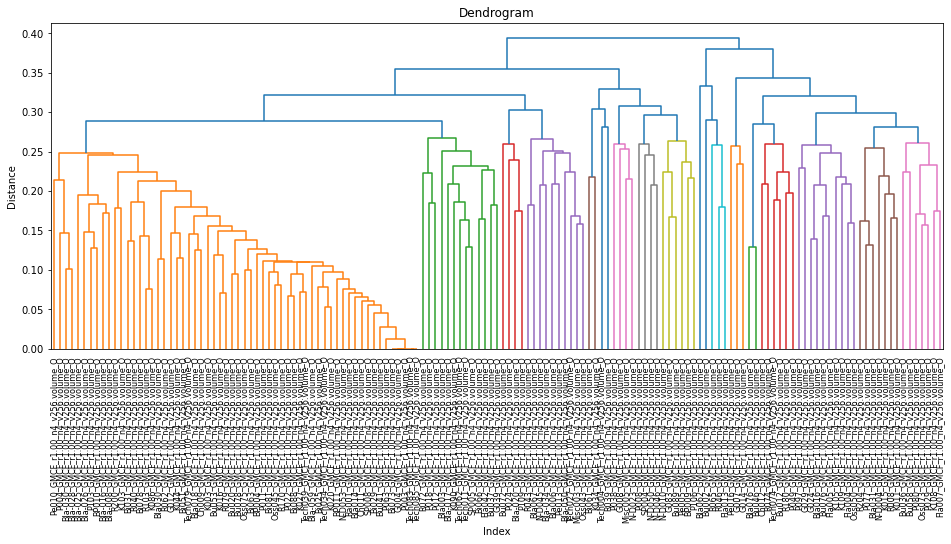

In [7]:
# weak_sinkhorn_distance_array_later,sinkhorn_distance_array_later

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=keys_calc,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [8]:
import pandas as pd 
csv_path = '/home/linsel/Documents/PhD/Data/NeanderthalMuseum/'
csv_name = 'Disapale_altered.csv'

csv_data = pd.read_csv(csv_path + csv_name, sep=",")

145
0 Bla018_GMCF_r1.00_n4_v256.volume_O 0
1 Misc003_GMCF_r1.00_n4_v256.volume_O 1
2 Fla004_GMCF_r1.00_n4_v256.volume_O 2
3 G007_GMCF_r1.00_n4_v256.volume_O 3
4 Bi078_GMCF_r1.00_n4_v256.volume_O 4
5 Ch009_GMCF_r1.00_n4_v256.volume_O 5
6 P077_GMCF_r1.00_n4_v256.volume_O 6
7 Bu020_GMCF_r1.00_n4_v256.volume_O 7
8 Pe010_GMCF_r1.00_n4_v256.volume_O 8
9 P008_GMCF_r1.00_n4_v256.volume_O 9
10 Bi031_GMCF_r1.00_n4_v256.volume_O 10
11 G004_GMCF_r1.00_n4_v256.volume_O 11
12 Bla006_GMCF_r1.00_n4_v256.volume_O 12
13 Tech083_GMCF_r1.00_n4_v256.volume_O 13
14 Oss073_GMCF_r1.00_n4_v256.volume_O 14
15 P011_GMCF_r1.00_n4_v256.volume_O 15
16 N-D050_GMCF_r1.00_n4_v256.volume_O 16
17 Bla-020_GMCF_r1.00_n4_v256.volume_O 17
18 Bla030_GMCF_r1.00_n4_v256.volume_O 18
19 R204_GMCF_r1.00_n4_v256.volume_O 19
20 K027_GMCF_r1.00_n4_v256.volume_O 20
21 K015_GMCF_r1.00_n4_v256.volume_O 21
22 P022_GMCF_r1.00_n4_v256.volume_O 22
23 R180_GMCF_r1.00_n4_v256.volume_O 23
24 Ch012_GMCF_r1.00_n4_v256.volume_O 24
25 N-D053_GMCF

/tmp/ipykernel_30448/3584169204.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


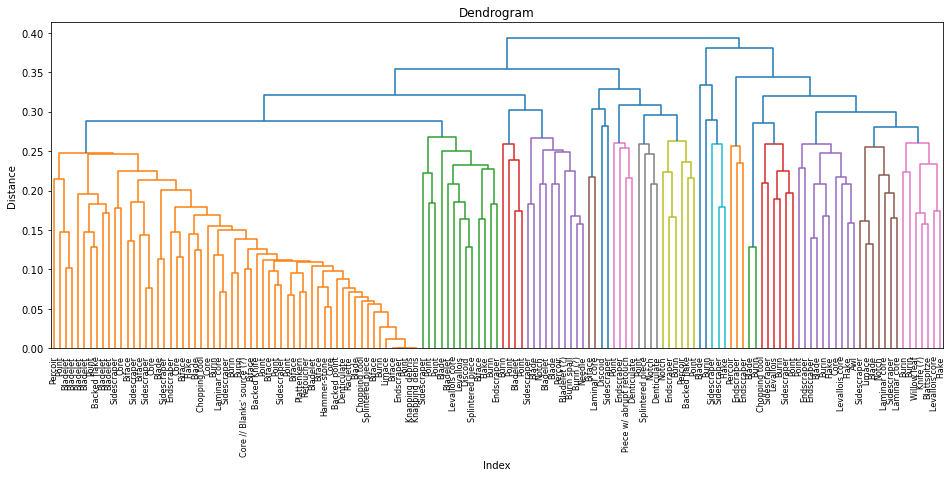

In [9]:
# create a figure of dendrogram with balnk as label

label_blank = []
print(len(keys_calc))
for n,key in enumerate(keys_calc):
    if csv_data[csv_data["disapale_no"] == key.split('_')[0]]['type'] is None:
      print('fewf')
    data = csv_data[csv_data["disapale_no"] == key.split('_')[0]]['type']
    print(n,key,len(label_blank))
    label_blank = label_blank + list(data)

print(len(label_blank))

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=label_blank,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

145
0 Bla018_GMCF_r1.00_n4_v256.volume_O 0
1 Misc003_GMCF_r1.00_n4_v256.volume_O 1
2 Fla004_GMCF_r1.00_n4_v256.volume_O 2
3 G007_GMCF_r1.00_n4_v256.volume_O 3
4 Bi078_GMCF_r1.00_n4_v256.volume_O 4
5 Ch009_GMCF_r1.00_n4_v256.volume_O 5
6 P077_GMCF_r1.00_n4_v256.volume_O 6
7 Bu020_GMCF_r1.00_n4_v256.volume_O 7
8 Pe010_GMCF_r1.00_n4_v256.volume_O 8
9 P008_GMCF_r1.00_n4_v256.volume_O 9
10 Bi031_GMCF_r1.00_n4_v256.volume_O 10
11 G004_GMCF_r1.00_n4_v256.volume_O 11
12 Bla006_GMCF_r1.00_n4_v256.volume_O 12
13 Tech083_GMCF_r1.00_n4_v256.volume_O 13
14 Oss073_GMCF_r1.00_n4_v256.volume_O 14
15 P011_GMCF_r1.00_n4_v256.volume_O 15
16 N-D050_GMCF_r1.00_n4_v256.volume_O 16
17 Bla-020_GMCF_r1.00_n4_v256.volume_O 17
18 Bla030_GMCF_r1.00_n4_v256.volume_O 18
19 R204_GMCF_r1.00_n4_v256.volume_O 19
20 K027_GMCF_r1.00_n4_v256.volume_O 20
21 K015_GMCF_r1.00_n4_v256.volume_O 21
22 P022_GMCF_r1.00_n4_v256.volume_O 22
23 R180_GMCF_r1.00_n4_v256.volume_O 23
24 Ch012_GMCF_r1.00_n4_v256.volume_O 24
25 N-D053_GMCF

/tmp/ipykernel_30448/1331906926.py:23: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


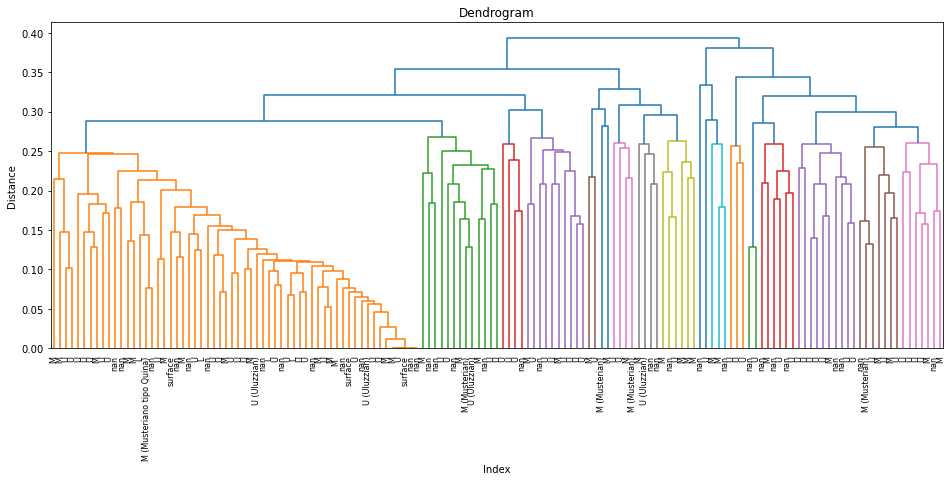

In [10]:
# create a figure of dendrogram with balnk as label

label_blank = []
print(len(keys_calc))
for n,key in enumerate(keys_calc):
    if csv_data[csv_data["disapale_no"] == key.split('_')[0]]['chronology'] is None:
      print('fewf')
    data = csv_data[csv_data["disapale_no"] == key.split('_')[0]]['chronology']
    print(n,key,len(label_blank))
    label_blank = label_blank + list(data)

print(len(label_blank))

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=label_blank,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

/tmp/ipykernel_30448/3719991173.py:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')


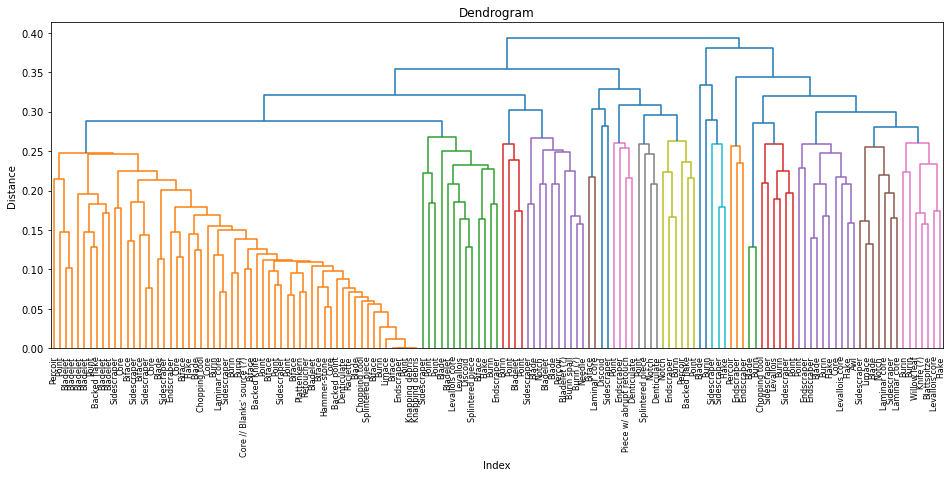

In [11]:
# create a figure of dendrogram with width as label

label_blank = []

for key in keys_calc:
    data = csv_data[csv_data["disapale_no"] == key.split('_')[0]]['type']#/csv_data[csv_data["disapale_no"] == key.split('_')[0]]['height']#/csv_data[csv_data["disapale_no"] == key.split('_')[0]]['height']
    label_blank = label_blank + list(data)

import numpy as np
from scipy.cluster import hierarchy
from matplotlib import pyplot as plt

# Create a sample distance matrix
distance_matrix = weak_sinkhorn_distance_array_later
# distance_matrix = sinkhorn_distance_array_later

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(distance_matrix, method='complete')

plt.figure(figsize=(16, 6))

# Plot the dendrogram
dendrogram = hierarchy.dendrogram(  linkage_matrix, 
                                    labels=label_blank,
                                    leaf_rotation=90.,  # rotates the x axis labels
                                    leaf_font_size=8.,  # font size for the x axis labels                                  
                                  )

plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()